In [ ]:
import pickle
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/ml project"
X = pickle.load(open(path + 'X.pkl','rb'))
y = pickle.load(open(path+ 'y.pkl','rb'))

In [ ]:
X=X/255

In [ ]:
X.shape

(23000, 100, 100, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = "relu"))

model.add(Dense(2, activation = "softmax"))






In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X, y, epochs=5, validation_split = 0.1)

Epoch 1/5
647/647 [==============================] - 447s 690ms/step - loss: 0.7324 - accuracy: 0.5840 - val_loss: 0.5900 - val_accuracy: 0.6704
Epoch 2/5
647/647 [==============================] - 449s 694ms/step - loss: 0.5778 - accuracy: 0.6999 - val_loss: 0.5739 - val_accuracy: 0.7035
Epoch 3/5
647/647 [==============================] - 444s 686ms/step - loss: 0.4970 - accuracy: 0.7558 - val_loss: 0.5272 - val_accuracy: 0.7396
Epoch 4/5
647/647 [==============================] - 444s 686ms/step - loss: 0.3651 - accuracy: 0.8378 - val_loss: 0.4961 - val_accuracy: 0.7596
Epoch 5/5
647/647 [==============================] - 444s 687ms/step - loss: 0.2072 - accuracy: 0.9200 - val_loss: 0.5889 - val_accuracy: 0.7765


In [ ]:
model.history.history

{'accuracy': [0.6236231923103333,
  0.7003864645957947,
  0.7626569867134094,
  0.8384541273117065,
  0.9158937335014343],
 'loss': [0.6568674445152283,
  0.5742529034614563,
  0.4883871078491211,
  0.36294448375701904,
  0.2096031904220581],
 'val_accuracy': [0.6704347729682922,
  0.7034782767295837,
  0.7395651936531067,
  0.7595652341842651,
  0.7765217423439026],
 'val_loss': [0.58997642993927,
  0.5738506317138672,
  0.5271620750427246,
  0.4961198568344116,
  0.5888614058494568]}

<function matplotlib.pyplot.show>

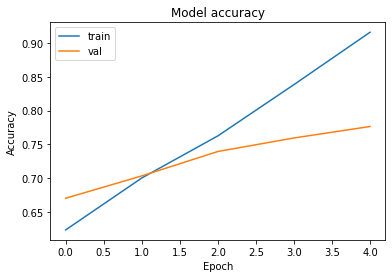

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','val'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

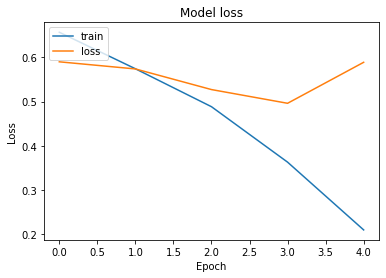

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','loss'],loc='upper left')
plt.show